Trinôme G1 :


*   **AMAZOUZ Sara Selma**
*   **GHENAIET Walid**
*   **MOULAI Mohamed Youcef**




In [ ]:
import numpy as np
import pandas as pd
import math
import cv2
import matplotlib.pyplot as plt
from numpy import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
# Pour RNC
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [ ]:
# données
X = np.genfromtxt('/content/data.csv', delimiter=',', dtype=int)
X.shape
#X = X[:100]
df = pd.read_csv("/content/data.csv",nrows=5000)
df

,13,13.1,13.2,13.3,13.4,13.5,13.6,13.7,13.8,13.9,...,13.211,13.212,13.213,13.214,13.215,13.216,13.217,13.218,13.219,13.220
0,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
1,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
2,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
3,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
4,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
4995,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
4996,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
4997,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17


In [ ]:
# étiquettes
Y = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
Y.shape
#Y = Y[:100]

(5000,)

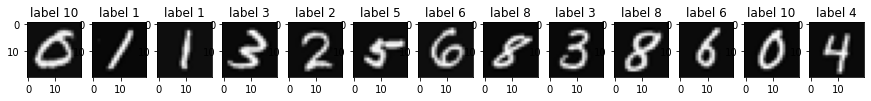

In [ ]:
plt.figure(figsize=(15,8))
for i in range(13): #note: each 500 lines, there is a new value
    c = random.randint(X.shape[0]) #pick a random line from the dataset
    a = X[c,:].reshape((20, 20)) #shape of one number in the image
    a=np.transpose(a) # la transposé (rendre les ligne des colonne et vice versa)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(Y[c]))
    plt.imshow(a,cmap='gray')

In [ ]:
A = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
A.shape
#A = A[:100]
B = np.genfromtxt('labels1.csv', delimiter=',', dtype=int)
B.shape
#B = B[:100]

(5000,)

In [ ]:
np.array_equal(A, B)

True

In [ ]:
def conf_matrix(actual, predicted):

  n = len(np.unique(actual))      # Nombre de classes
  matrix = np.zeros((n, n))       # Créer un nparray 2d (matrice carré) initialisé à 0

  for i in range(len(actual)):
    matrix[actual[i]-1][predicted[i]-1] += 1    # Parcourir le nparray des labels en remplissant les cases de la matrice de confusion
    # 10 8

  return matrix.astype(np.int64)

In [ ]:
c = conf_matrix(A,B)
print(c)

[[500   0   0   0   0   0   0   0   0   0]
 [  0 500   0   0   0   0   0   0   0   0]
 [  0   0 500   0   0   0   0   0   0   0]
 [  0   0   0 500   0   0   0   0   0   0]
 [  0   0   0   0 500   0   0   0   0   0]
 [  0   0   0   0   0 500   0   0   0   0]
 [  0   0   0   0   0   0 500   0   0   0]
 [  0   0   0   0   0   0   0 500   0   0]
 [  0   0   0   0   0   0   0   0 500   0]
 [  0   0   0   0   0   0   0   0   0 500]]


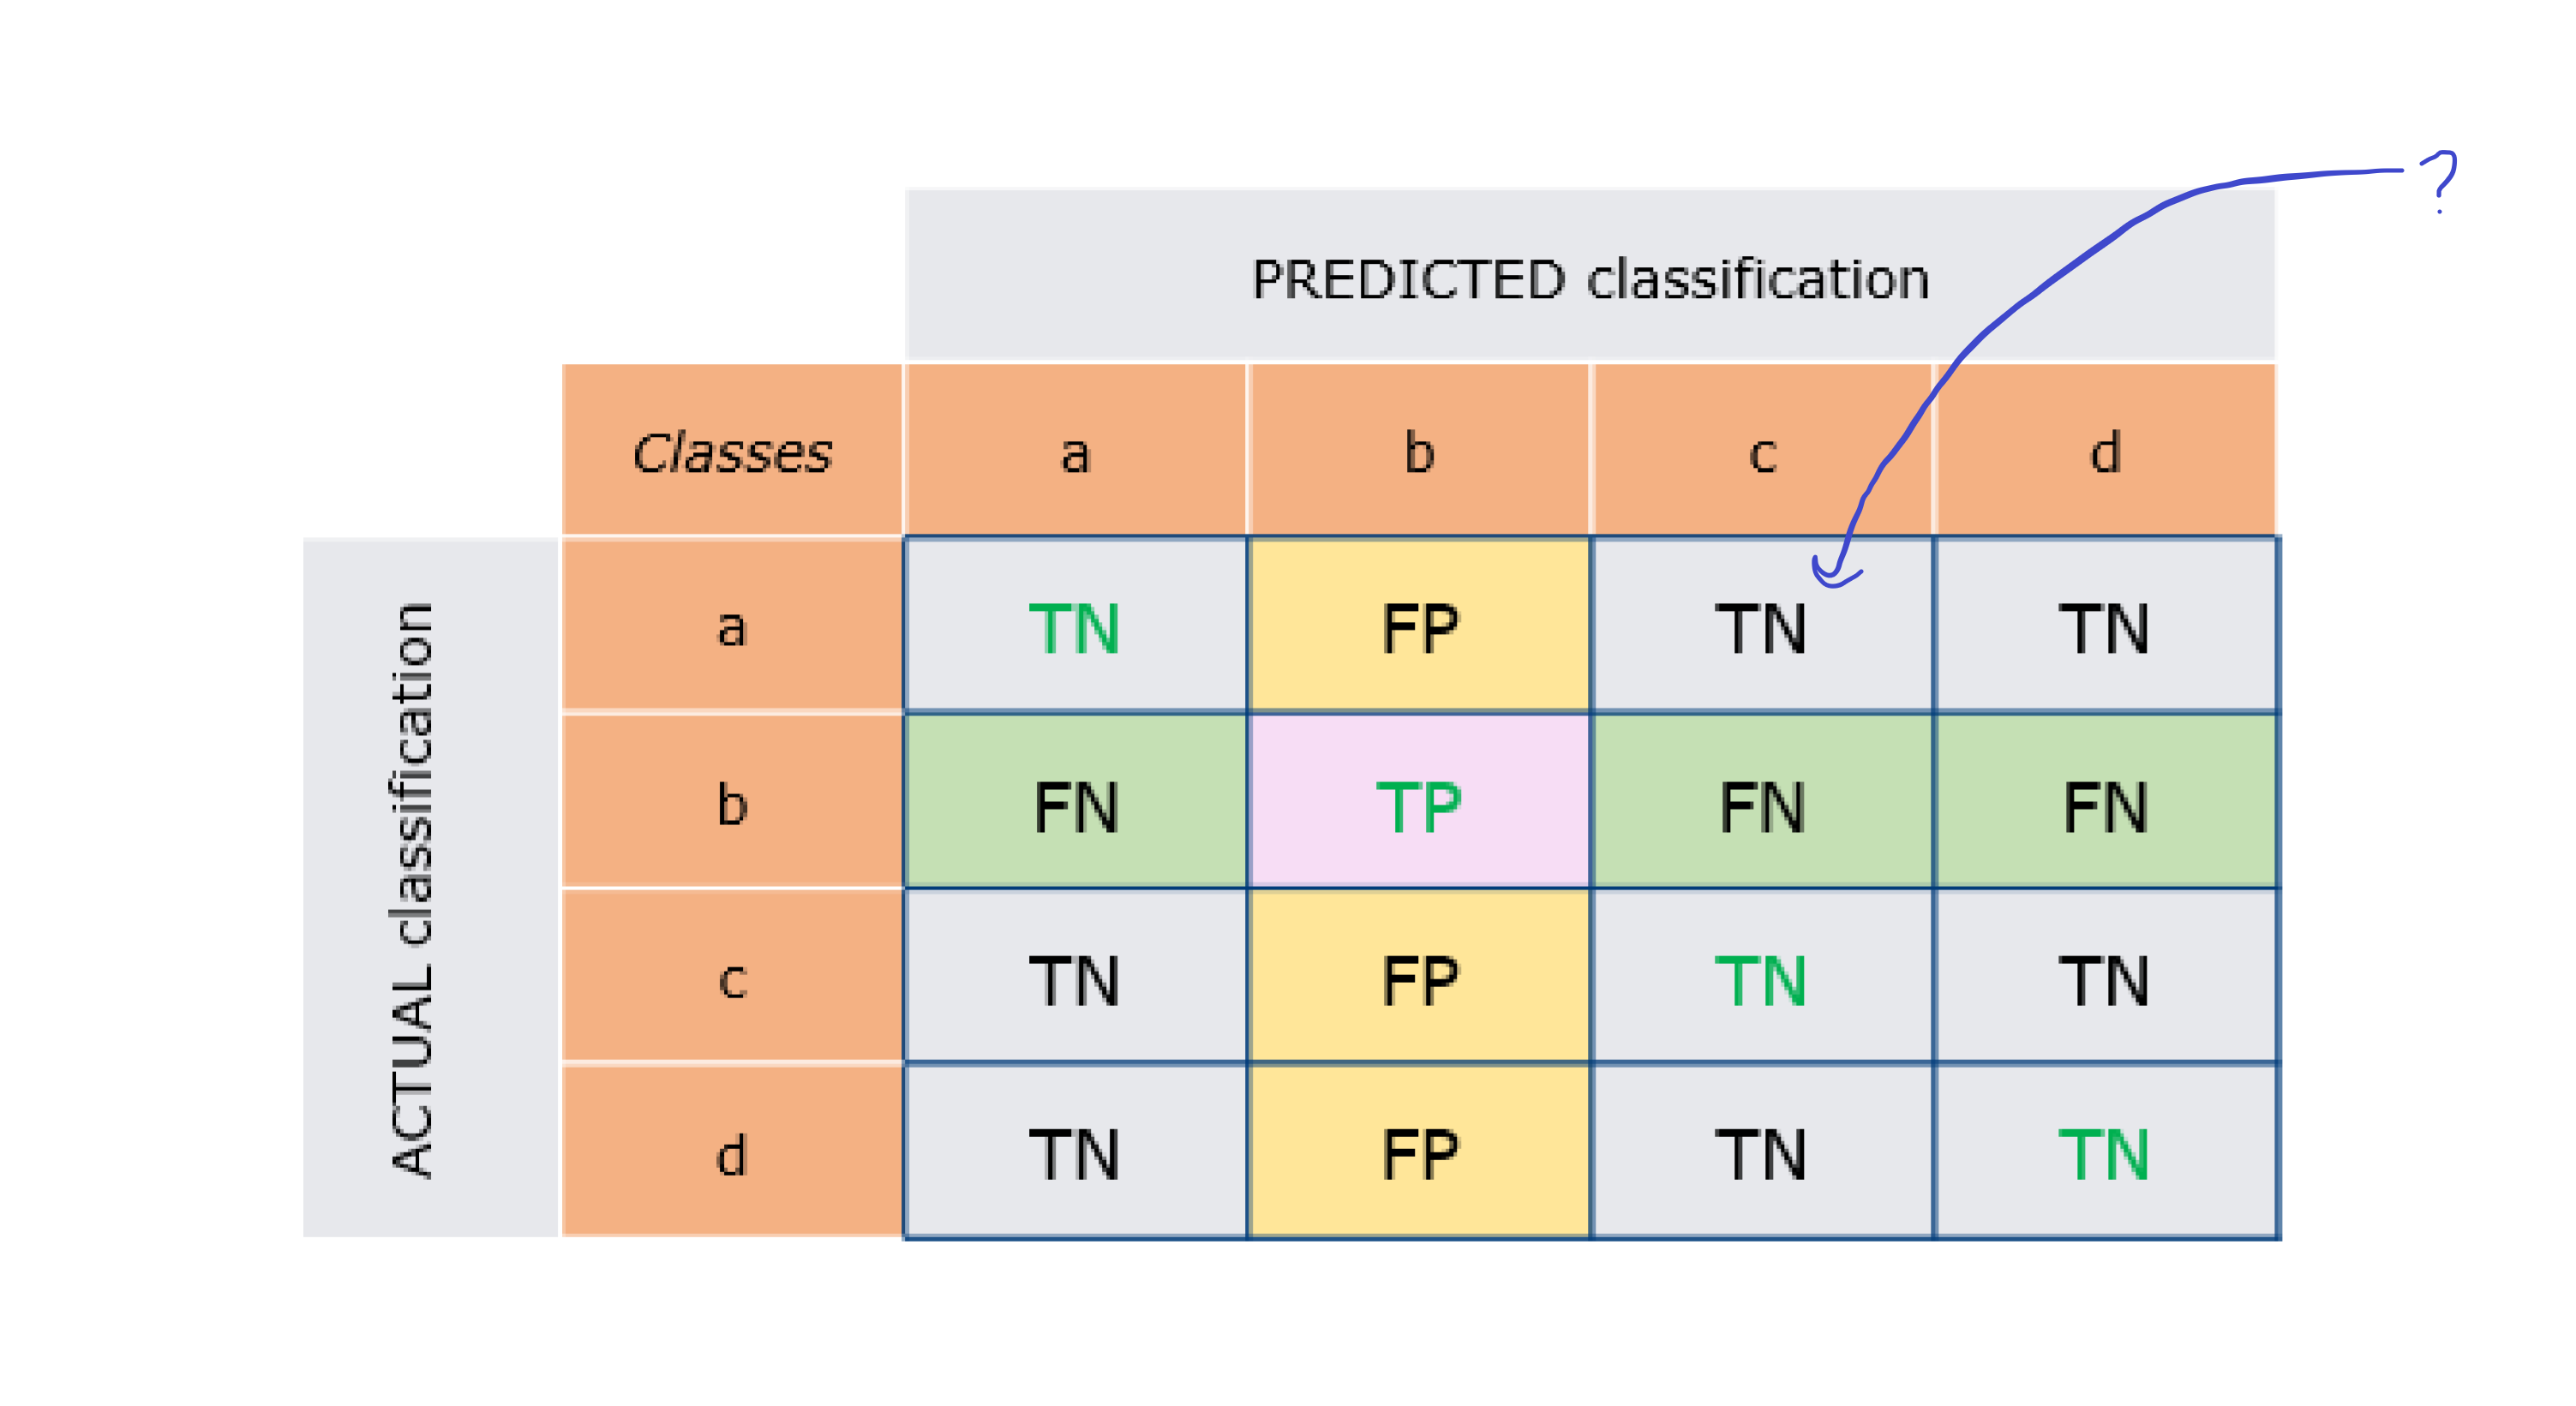

In [ ]:
# On considère la première classe 'i' comme la classe positive, et le reste comme classe négative
def extraction(matrix):

  # 4 listes qui contiennent les informations(TP,TN,FP,FN) de toutes les classes
  TP_list = []
  TN_list = []
  FP_list = []
  FN_list = []

  for i in range(matrix.shape[0]):
    TP = matrix[i][i]
    TN = np.sum(matrix) - np.sum(matrix[i]) - np.sum(matrix[:, i]) + TP
    FP = np.sum(matrix[:, i]) - TP # somme de la colonne i - (i,i)
    FN = np.sum(matrix[i]) - TP    # somme de la ligne i - (i,i)
    TP_list.append(FP)
    TN_list.append(TN)
    FP_list.append(FP)
    FN_list.append(FN)

  return TP_list, TN_list, FP_list, FN_list

In [ ]:
TP,FN,FP,TN = extraction(conf_matrix(A,B))

- Rappel : \begin{equation*} \frac{TP}{TP+FN} \end{equation*}

In [ ]:
def rappel(TP, FN):

  return (TP / (TP + FN))

- Précision : \begin{equation*} \frac{TP}{TP+FP} \end{equation*}

In [ ]:
def precision(TP, FP):

  return (TP / (TP + FP))


- Spécificité : \begin{equation*} \frac{TN}{TN+FP} \end{equation*}


In [ ]:
def specificite(TN, FP):

  return(TN / (TN + FP))

- Taux de FP = 1 - Spécificité : \begin{equation*} 1 – \frac{TN}{TN+FP} = \frac{FP}{TN+FP} \end{equation*}


In [ ]:
def TauxFP(TN, FP):

  return(FP / (TN + FP))

- Taux de TP : \begin{equation*}\frac{TP}{FN+TP}\end{equation*}

In [ ]:
def TauxTP(TP, FN):

  return(TP / (FN + TP))

- Courbe ROC

In [ ]:
def ROC(A, B, n):

# Initialisation
  tpr_list = []
  fpr_list = []
  auc = []
  N = n

  # Variation du threshold & re-calcul des informations
  for threshold in np.linspace(0, 1, num=101):
    # Initialisation
    tp = 0
    fn = 0
    fp = 0
    tn = 0
    for i in range(len(B)):
        for j in range(N):
            if B[i] == j:
                if A[i] == j:
                    if B[i] >= threshold:
                        tp += 1
                    else:
                        fn += 1
                else:
                    if B[i] >= threshold:
                        fp += 1
                    else:
                        tn += 1

    # Re-calcul du Taux TP et Taux FP
    if (tp+fn)!=0 and (fp+tn)!=0 :
      tpr = tp / (tp + fn)
      fpr = fp / (fp + tn)
      tpr_list.append(tpr)
      fpr_list.append(fpr)
      auc.append(np.trapz(tpr, fpr))

# Dessin de la courbe
  plt.figure()
  lw = 2
  colors = ['blue', 'red', 'green']
  for i, j, k, color in zip(fpr_list, tpr_list, auc, colors):
    plt.plot(i, j, color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'''.format(k))

  plt.plot([0, 1], [0, 1], 'k--')
  plt.title('ROC for multi-classification')
  plt.xlabel('Taux de FP')
  plt.ylabel('Taux de TP')
  plt.show()


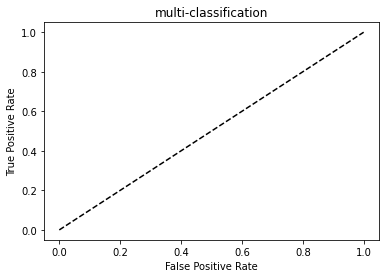

In [ ]:
ROC(A,B,10)

Définir d'abord la base d'entrainement Xt, Yt et la base de test Xtt, Ytt



In [ ]:
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
Xt, Xtt, Yt, Ytt = train_test_split(
      scaled_features, Y, test_size = 0.30)

***KNN***

In [ ]:
# Calcul de la distance en passant les indexes de deux lignes et le nombre de colonnes
def dist_euc(ind1,ind2,n):
  dist = 0

  # Parcours des colonnes
  for i in range(n):
    dist += np.square(Xtt[ind1][i] - Xt[ind2][i])

  return np.sqrt(dist)

In [ ]:
import statistics

def KNNpredictor (k, Xt, Xtt, Yt):

  K = k

  # Predictions
  pred = []

  # Matrice des proba des predictions
  proba_pred = []

  # Parcourir chaque instance du test-set
  for i in range(Xtt.shape[0]):

    # Sauvegarde des distances
    distances = []

    # Sauvegarde des K plus proches distances
    proches_distances = []

    # Proba des predictions de chaque classe
    classes_proba = []

    # Parcourir chaque instance du train-set
    for j in range(Xt.shape[0]):

      # Calculer la distance et la stocker
      s = dist_euc(i, j, Xt.shape[1])
      distances.append(s)

    # Trier les distances et prendre les K premieres
    distances = np.array(distances)
    updated_dists = np.argsort(distances)[:K]
    proches_distances = Yt[updated_dists]
    proches_distances = np.array(proches_distances)

    # predict_proba
    for k in range(1,11):

      # Compter les occurences de la classe k
      proba = (proches_distances == k).sum()/K

      # Proba de la classe k
      classes_proba.append(proba)

    # Proba de toutes les classes pour l'instance i
    proba_pred.append(classes_proba)

    # Effectuer un pseudo-vote en calculant le mode
    pred.append(statistics.mode(proches_distances))

  return pred, proba_pred


In [ ]:
pred, probas = KNNpredictor(5, Xt, Xtt, Yt)

[10 10 10 10 10]
[29.9953936  19.95115679 34.32507958 22.51050552 28.41586379 24.80745194
 35.48910912 14.97694631 28.76961285 23.85378099 30.34007543 23.31788315
 29.88675802 29.18592979 18.85362043 28.1831014  25.02890704 20.02853035
 31.52444666 23.01048035 35.49711991 17.21906097 30.47874281 28.09831478
 28.25596695 41.21280199 18.75189453 37.02081678 22.15073288 34.05658633
 36.29814443 29.26173009 30.58655522 28.25391761 27.46280517 26.56858308
 20.07517469 33.57414676 22.39288156 20.53484729 37.56565621 27.66340598
 26.37499836 24.74306313 33.78076459 26.09375028 23.65107925 45.07691799
 23.68360288 31.04493113 26.60418123 23.21381063 35.2970341  21.03947319
 42.56867177 18.14833373 32.89389521 31.72516825 25.38399779 21.9543582
 25.6030999  23.39748687 17.36470718 17.81933782 31.63281983 38.15840682
 23.66381061 39.9676862  27.01718423 33.96698288]
[ 7 21 62 63 55]


In [ ]:
print(pred)
print(len(pred))

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
30


In [ ]:
print(len(probas))
print(probas)

30
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.

In [ ]:
predictions = []
probabilities = []

# Variation du nombre de voisins pris en compte
for k in range(1,10):

  print("Case K = ", k)
  print()
  pred, probas = KNNpredictor(k, Xt, Xtt, Yt)

  print("Ytt pred : ")
  print(pred)
  print()

  print("Ytt pred proba : ")
  print(probas)
  print()


  confmatrix = conf_matrix(Ytt, pred)
  print("confusion matrix : ")
  print(confmatrix)

  TP,FN,FP,TN = extraction(confmatrix)
  for x in range(10):
    print("Class ", x+1)
    print("Rappel = ", rappel(TP[x], FN[x]))
    print("Precision = ", precision(TP[x], FP[x]))
    print("Specifité = ", specificite(TN[x], FP[x]))
    print("Taux de FP = ", TauxFP(TN[x], FP[x]))
    print("Taux de TN = ", TauxTP(TP[x], FN[x]))
    print()

  print("Courbe ROC : ")
  ROC(Ytt, pred, 10)

  predictions.append(pred)
  probabilities.append(probas)

Case K =  1

